# Introduction to nueral network classification with Tensorflow

**A classificatoin is where you try to classify something as one thing or another**

A few type of classification problems: 
    
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit the

In [1]:
from sklearn.datasets import make_circles # it's the toy dataset 

# make 1000 examples
n_samples=1000

# Create cirlce
x,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [2]:
# Create the features
x[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# create the labels
y[:5]

array([1, 1, 1, 1, 0], dtype=int64)

#### as our data is little hard to understand right now... lets visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### visualize it with plot

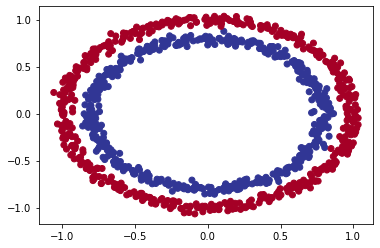

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu) # cmap is color dont think its too complex
# also if you have confusion what is x[:,0] then it is this [first_row:last_row,column=0]

# here in this model we try to classify whether our next 1000 data will be blue or red

### Input and output shapes

In [6]:
# check the shapes of our features and labels
x.shape , y.shape

((1000, 2), (1000,))

In [7]:
# View tge first example of feature and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [8]:
# Create the model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# Fit the model
model.fit(x,y,epochs=100,verbose=0)

In [9]:
# Evaluate the model
model.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5120


[0.693356990814209, 0.5120000243186951]

### Imporoving the model

* Add more layer
* try different optimizers like adam
* try increase the epochs

#### Imporoved model

In [10]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# Fit the model
model_2.fit(x,y,epochs=100,verbose=0) # fit for 100 passes of the data

In [11]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5000


[0.6989450454711914, 0.5]

In [12]:
model_2.predict(x)

32/32 [==============================] - 0s 615us/step


array([[0.44217896],
       [0.4613756 ],
       [0.4625526 ],
       [0.46633777],
       [0.42571577],
       [0.46720928],
       [0.4631748 ],
       [0.440405  ],
       [0.4359669 ],
       [0.4686557 ],
       [0.44701174],
       [0.45596975],
       [0.46511206],
       [0.43208116],
       [0.42923158],
       [0.43160716],
       [0.4547208 ],
       [0.43219793],
       [0.4575505 ],
       [0.44330886],
       [0.44793484],
       [0.47159585],
       [0.4302184 ],
       [0.4432381 ],
       [0.46904862],
       [0.46469438],
       [0.46231332],
       [0.43412536],
       [0.4306047 ],
       [0.4306981 ],
       [0.4359227 ],
       [0.46953216],
       [0.46251026],
       [0.43473002],
       [0.42983735],
       [0.471628  ],
       [0.4664755 ],
       [0.45522898],
       [0.43095836],
       [0.44983077],
       [0.44216862],
       [0.46050546],
       [0.44550967],
       [0.43241113],
       [0.4489392 ],
       [0.45423815],
       [0.42829236],
       [0.459

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0) # fit for 100 passes of the data

### Let's visualize it , to visualize it lets create a function `plot_decision_boundary`

* Takes in trained model , features(x) and labels(y)
* Create a `meshgrid` of the different x values
* Makes predictions across the meshgrid`
* Plot the prediction as well as a line b/w zones (where each unique class falls)

In [14]:
import numpy as np



In [15]:
import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1 # we minus/add with 0.1 to get ourself lil bit some margin
    # it sets up small border b/w the min and max values of each samples so data point are not on very edge
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),     # Generate 100 equal values b/w x_min and x_max
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 
                         1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 654us/step
doing binary classifcation...


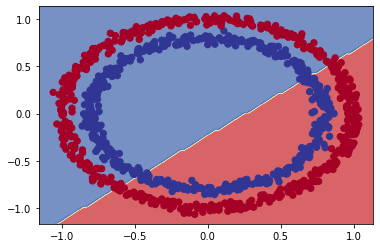

In [16]:
plot_decision_boundary(model_3,x,y)

## Let see if our model can be used for a regression problem...

In [17]:
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0,1000,5) 
y_regression = tf.range(100,1100,5)  # y= x+100

x_regression , y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [18]:
# split into training and testing sets
x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]

x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]


In [19]:
new_model= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

new_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
    )
new_model.fit(tf.expand_dims(x_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9374 - mae: 45.9374
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 989us/step


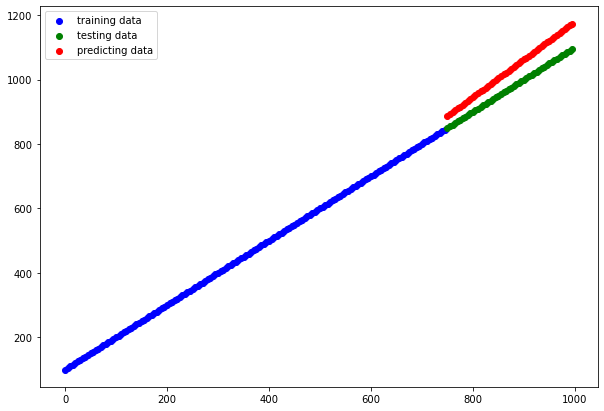

In [20]:
# Make prediction with our trained model
y_reg_preds = new_model.predict(x_reg_test)

# Plot the model's prediction against our regression model
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="blue",label="training data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="testing data")
plt.scatter(x_reg_test,y_reg_preds,c="r",label="predicting data")
plt.legend();

# Common ways to improve deep model:

#### Adding layers
#### Increase the numbers of hidden unit:
#### Change the activation functions
#### Change the optimization functions
#### Change the learning rate
#### Fitting more data
#### fitting for longer
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# THE MISSING PIECE : NON-LINEARITY

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear) # here setting the activation function linear
    
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])
# 3. Fit the model
# history=model_4.fit(tf.expand_dims(x,axis=-1),y,epochs=100) # use tf.expand_dims only when it show error while fitting the model/
model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

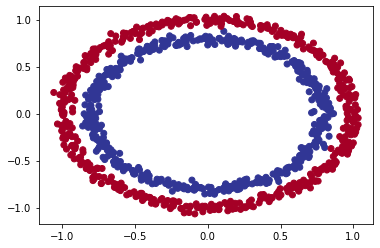

In [22]:
# check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 0s 575us/step
doing binary classifcation...


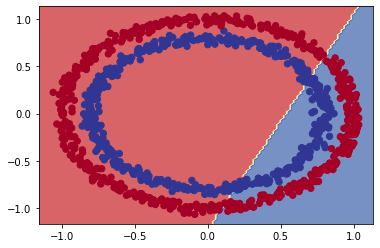

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,x=x,y=y) 


Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

### lets build our nueral network with a non-linear activation function

In [24]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(x,y,epochs=100,verbose=0)

In [25]:
model_5.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931846141815186, 0.5]

313/313 [==============================] - 0s 716us/step
doing binary classifcation...


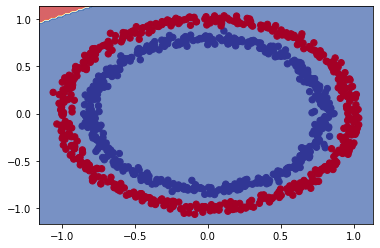

In [26]:
plot_decision_boundary(model_5,x,y)

Lets make more better model
time to replicate multi-layer nueral network from tensorflow



In [27]:
# set the random seed
tf.random.set_seed(42)

# 1. Make the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(x,y,epochs=100)

Epoch 1/100


C:\Users\Amit\Desktop\sample\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 3.2090 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6531 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5983 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5333 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4114 - accuracy: 0.1490
Epoch 11/100
32/32 [=

313/313 [==============================] - 0s 547us/step
doing multiclass classification...


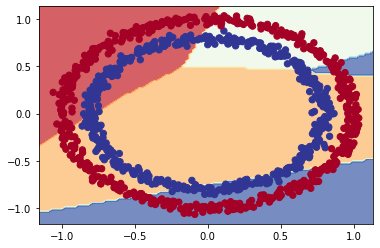

In [28]:
model.evaluate(x,y),
plot_decision_boundary(model_6,x,y)

meme material 👆


#### This time we'll change the activation function on our output layer too.


#### Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [29]:
# set the random seed
tf.random.set_seed(42)

# 1. Make the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"), #  layer-1
    tf.keras.layers.Dense(4,activation="relu"), # hidden layer-2
    tf.keras.layers.Dense(1,activation="sigmoid") # output layer
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_6.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

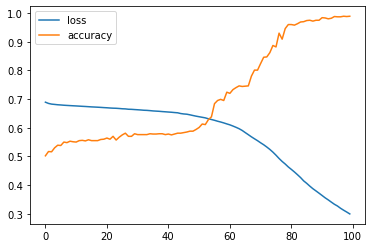

In [30]:
pd.DataFrame(history.history).plot();

In [31]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

313/313 [==============================] - 0s 558us/step
doing binary classifcation...


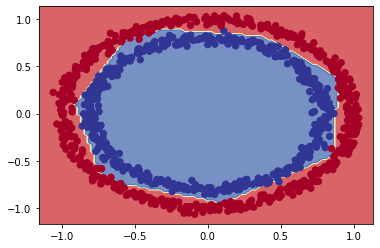

In [32]:
plot_decision_boundary(model_6,x,y)

see we got the result 

our aim was to get `non linear` line between red and blue circle see we are getting our white line in between


**Note**: The combination of linear (straight lines) and non-linear (non-straight lines) function is one of the key fundamentals of nueral network

# Study about all the activation functions

In [33]:
# create a toy tensor (similar to the date we pass into our models)
a = tf.cast(tf.range(-10,10),tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

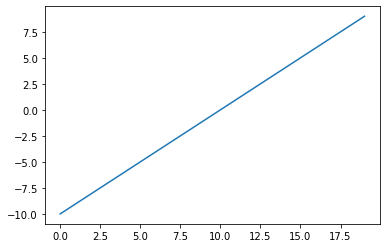

In [34]:
# visualize our toy tensor
plt.plot(a);

In [35]:
# let's start by replicating sigmoid- sigmoid(x) = 1 / (1 + exp(-x)) . non linear function
def sigmoid (x):
    return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

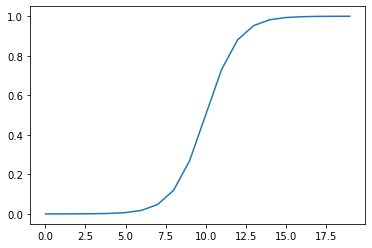

In [36]:
plt.plot(sigmoid(a));

In [37]:
# use the relu function
# for reference - https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it
def relu(x):
    return tf.maximum(x,0)  # for relu it take only x>0 and other less than will be converted to 0
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

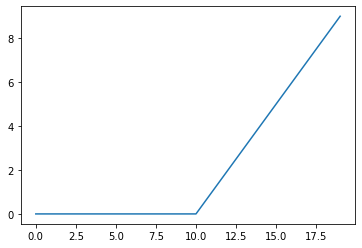

In [38]:
plt.plot(relu(a))

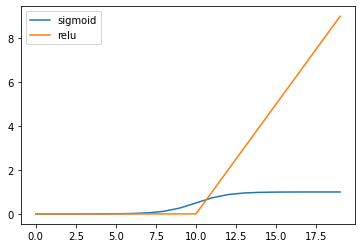

In [39]:
plt.plot(sigmoid(a),label="sigmoid");
plt.plot(relu(a),label="relu");
plt.legend();

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

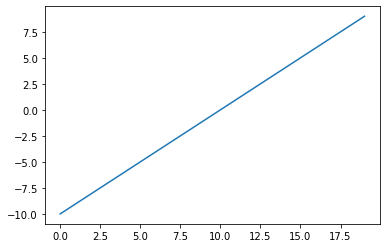

In [41]:
# Does the linear activation function do anything?
plt.plot(tf.keras.activations.linear(a));

In [42]:
# Does a even changed?
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and imporoving our classification 


So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [43]:
# check how many examples we have 
len(x),len(y)

(1000, 1000)

In [44]:
# split into training and testing sets
x_train, y_train = x[:800],y[:800]
x_test, y_test = x[800:],y[800:]
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [45]:
# Let's recreate a model to fit on the training data and evaluating on the testing dataset

# set the random seed
tf.random.set_seed(42)

# 1 . Creating the model (same as model 7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") # o/p layer
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history=model_8.fit(x_train,y_train,epochs=25)

Epoch 1/25


C:\Users\Amit\Desktop\sample\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

### ValueError: logits and labels must have the same shape ((32, 1) vs (32, 2))


It will give the error when it has more than 1 nueron in output layer in comparision of hidden and input layer

In [46]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

313/313 [==============================] - 0s 627us/step
doing binary classifcation...
313/313 [==============================] - 0s 710us/step
doing binary classifcation...


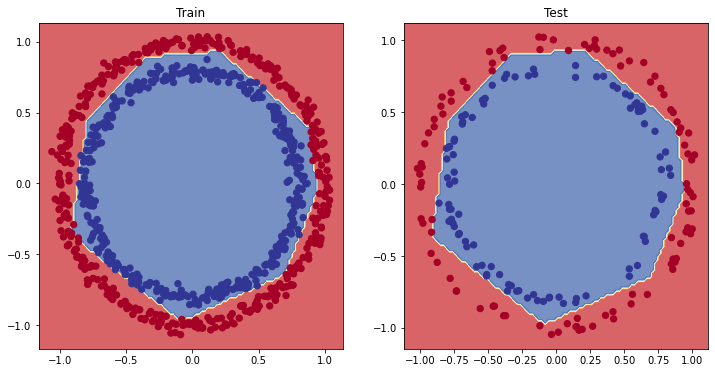

In [47]:
# Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #(row,col,index)
plt.title("Train")
plot_decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,x_test,y_test)

In [48]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [49]:
history.history

{'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632685661315918,
  0.6545671820640564,
  0.6412574648857117,
  0.6264280676841736,
  0.603830873966217,
  0.5714035034179688,
  0.5404428243637085,
  0.5015037059783936,
  0.46833184361457825,
  0.41130149364471436,
  0.36250579357147217,
  0.3209042251110077,
  0.2847079038619995,
  0.2597199082374573,
  0.23746894299983978,
  0.21351952850818634,
  0.19382020831108093,
  0.1752435863018036,
  0.16189301013946533,
  0.1549890637397766,
  0.1489727944135666],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.966

In [50]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

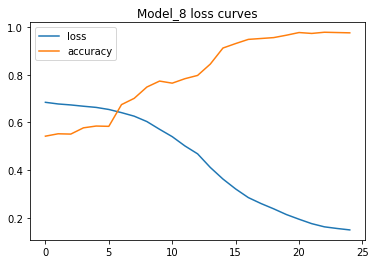

In [51]:
# Plot the curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note** - For many problems, the loss function going down means the total model is improving (the predictions it's making are getting closer to the ground truth label)

## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your while it's training.

* Another model 

* Modified loss curves plot

In [52]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# create the learning rate callbacks
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # its says 10^-4 x 10 ^(epoch/20)
# # It is a conventional notation for 1 x 10^-4=0.0001

# But it can be ambiguous, as it can also mean (1e)^-4 = 0.018315…
# where e =~2.718281…

# fit the model
history= model_9.fit(x_train,y_train,epochs=100,callbacks=[lr_schedule]) # by the way you can also put more than 1 callbacks

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 999us/step - los

<AxesSubplot:xlabel='epochs'>

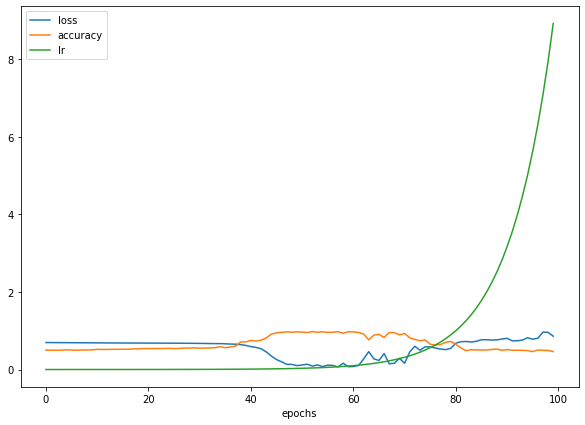

In [53]:
# Check out the history
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

In [54]:
# Plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [55]:
len(lrs)

100

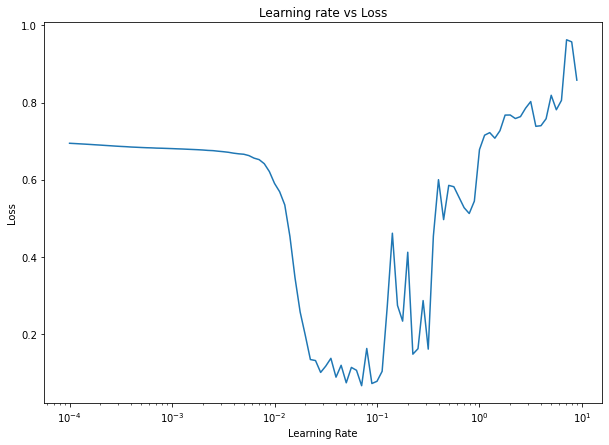

In [56]:
# PLot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs,history.history["loss"]) 
# semilogx( X , Y ) plots x- and y-coordinates using a base-10 logarithmic scale on the x-axis and a linear scale on the y-axis
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()




# ideal learning rate will be at somepoint near it is most lower

In [57]:
# Example of other typical learning rate values:
10**0,10**-1,10**-2,10**-3.1e-4

(1, 0.1, 0.01, 0.9992864533167718)

In [58]:
# see in the graph the graph comes lowest at 10**-2 -2 see b/w 10^-2 and 10^-1 at point 2 its lowest so it will be 0.02
10**-2

0.01

In [59]:
# Lets train the model with ideal learning rate
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])


# create the learning rate callbacks
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 **(epoch/20))

history = model_10.fit(x_train, y_train, epochs=25)

Epoch 1/25


C:\Users\Amit\Desktop\sample\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5300
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6025
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6538
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6950
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7337
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.8487
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.8400
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.9450
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.9712
Epoch 11/25
25/25 [===========

In [60]:
model_10.evaluate(x_test,y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.0579 - accuracy: 0.9850


[0.05786607787013054, 0.9850000143051147]

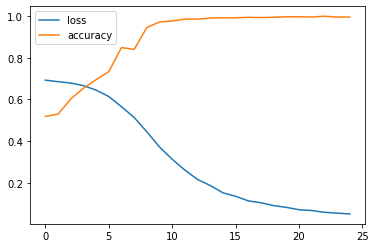

In [61]:
pd.DataFrame(history.history).plot();


In [62]:
model_8.evaluate(x_test,y_test),model_9.evaluate(x_test,y_test),model_10.evaluate(x_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9850


([0.12468849867582321, 1.0],
 [0.6934590339660645, 0.4950000047683716],
 [0.05786607787013054, 0.9850000143051147])

313/313 [==============================] - 0s 554us/step
doing binary classifcation...
313/313 [==============================] - 0s 544us/step
doing binary classifcation...


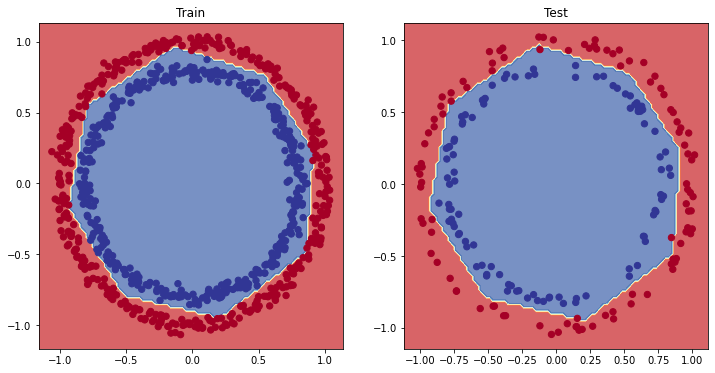

In [63]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

### More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
    
    * Accuracy
    * Precision
    * Recall
    * F1-score
    * Confusion matrix
    * Classification report (from scikit-learn) - https://scikitlearn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [64]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 0s/step - loss: 0.0579 - accuracy: 0.9850
Model loss on the test set: 0.05786607787013054
Model accuracy on the test set:98.50%


### How to make confusion matrix?

In [65]:
# # Create a confusion matrix
# from sklearn.metrics import confusion_matrix

# # Make predictions
# y_preds = model_10.predict(x_test)
# # confusion matrix
# confusion_matrix(y_test,y_preds)

# give this error
# ValueError: Classification metrics can't handle a mix of binary and continuous targets

As you can see Classification metrics can't handle a mix of binary and continuous targets
so lets round it up

In [66]:
y_test[:5],y_preds[:5]

NameError: name 'y_preds' is not defined

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = tf.math.round(model_10.predict(x_test))

# confusion matrix
confusion_matrix(y_test,y_preds)

### how about we pretify our confusion matrix?

Here created the function so we can check for every model

In [ ]:
# Note : the confusion matrix code we're about to write is remix of scikit-learn's plot_confusion_matrix #92

import itertools

def cm_figure(y_true,y_preds):
    figsize = (10,10)

    # Create the confusion matrix
    cm = confusion_matrix(y_test,tf.math.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
    

    # Lets prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm , cmap=plt.cm.Blues) # here cmp cm is colour matrix
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title = "Confusion Matrix",
           xlabel= "Predicted Label",
           ylabel= "True Label",
           xticks= np.arange(n_classes),
           yticks= np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set the x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set the threshold for different color
    threshold = (cm.max() + cm.min()) / 2.

    # PLot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j]> threshold else "black",
                size=15)


In [ ]:
cm_figure(y_test,y_preds)

# Working with a larger example (multiclass classification)


When you have more than two classes as an option, it's known as multi-class classification.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes,it's multi-class classification.

### Data-set is-:

To practise multi-class classification, we're going to build a nueral network to classify image of different items of clothing

we are taking tensorflow built-in dataset which is fashion clothing dataset which classify image on basis of clothes, uses 10 classes

In [68]:
# lets make different folder for this 